# Blog Post Draft

### Shuo and Jacob

#### Summary: are wheat prices being driven by a hot, dry summer?

Outline
1. Motivate with graphs of futures and spot prices
2. Show weather data (temperature and precipitation for weather stations in wheat-growing areas)
3. Compare weather data with wheat prices, see if they match

To do:
Compile weather data, compare weather this year to weather from past years

A recent Wall Street Journal article highlighted increasing futures prices for wheat and suggested that these were in part due to "extreme dryness and heat in the world’s breadbaskets, including Russia and the U.S." ([link to full article](https://www.wsj.com/articles/wheat-prices-skyrocket-after-dry-weather-coronavirus-lockdowns-11602249791?st=14rd570yuifxif8)). In this blog post, we explore the extent to which this year's prices appear to be driven by weather. Instead of sophisticated econometric analyses, we compare this year's weather in US wheat-growing areas to that of the past 10 years. The measures of weather that we use are precipitation and Extreme Degree Days (defined later). 

This post proceeds as follows. We review futures prices for wheat, highlighting a significant increase from Aug to Oct 2020. We also look at the amount of wheat in storage in 2020 compared to previous years and find that it has decreased somewhat, perhaps playing some role in the increased prices. Finally, we consider the weather data. Extreme Degree Days are found to have notably increased in several wheat-growing regions, and precipitation has also decreased this year. These weather conditions can lead to significantly lower wheat yields, driving up wheat prices.

In [2]:
# Basics
import os
import pandas as pd
import numpy as np
import random as rnd
from datetime import datetime

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits import mplot3d
%matplotlib inline

# Checking
import IPython

### 1. Futures price

In [38]:
cwd = os.getcwd()

# Read in prices data

filename = 'Futures_price_Wheat_2020_Dec.csv'
location = os.path.join(cwd, filename)
futures_df = pd.read_csv(location, header=0)

In [39]:
futures_df.dropna()
futures_df['Date'] = [datetime.strptime(x, '%m/%d/%Y').date() \
                    for x in futures_df['Date']]
futures_df = futures_df[futures_df['Date']>datetime(2020,1,1).date()]

Text(0.5, 1.0, 'Wheat Futures Prices (2020 December Contract)')

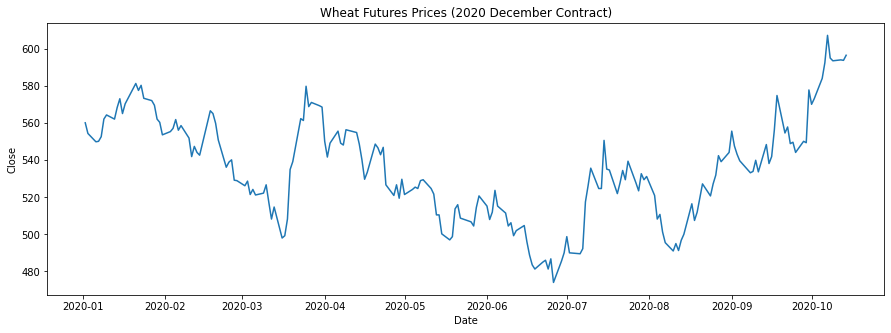

In [41]:
fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(data=futures_df, \
             x="Date", \
             y="Close").set_title("Wheat Futures Prices (2020 December Contract)")

Here we see that wheat futures prices have increased substantially since from the late summer to fall. COVID has had major impacts on both agricultural producers and consumers, but it's difficult to know to what degree these futures prices have been driven by the pandemic. Still, if you look at this graph, there is a big increase in futures price from mid-March to the beginning of April, which is when shelter-in-place orders were issued in the US. You might also notice another increase in prices starting in July, which is when the US experienced a "second wave" of COVID cases (see this [CDC graph](https://covid.cdc.gov/covid-data-tracker/#trends_dailytrendscases)). Of course, these correlations could be spurious, but the matching is interesting to note.

But what about the huge increase from August to October? What has driven that? Could it be weather, like the WSJ article suggested. Possibly. But before getting to this year's wheat weather (say that 5 times fast), we consider the role of storage. Could low storage quantities have driven up recent futures prices?

### 2. Storage

In [68]:
# Read in stock data

filename = 'Wheat_stock.xlsx'
location = os.path.join(cwd, filename)
stock_df = pd.read_excel(location, header=1)

In [72]:
stock_df['Year'] = [x.year for x in stock_df['Report_date']]
stock_df['Report Date Each Year'] = [x.month for x in stock_df['Report_date']]
numtostr = {"Report Date Each Year": {3: 'March 1st', 6: 'June 1st', 9: 'September 1st', 12: 'December 1st'}}
stock_df.replace(numtostr, inplace=True)

Text(0.5, 1.0, 'Stock Reported in March, June, September, and December from 2016 to 2020 (1,000 Bushels)')

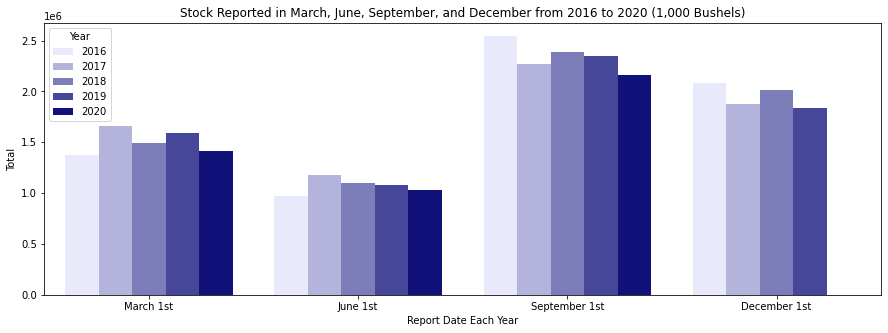

In [73]:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x="Report Date Each Year", y="Total", hue="Year", data=stock_df, color='darkblue').set_title("Total Stock Reported from 2016 to 2020 (1,000 Bushels)")

Storage quantities are a bit lower this year, but it's hard to know if the decrease is significant enough to increase prices. There's nothing in this graph that jumps out at us. Let's move on to weather conditions

### 3. Temperature

We start with the measure of Extreme Degree Days (EDD) this year compared to recent years. What is EDD? The formula looks bad ($\sum_d max(T_d - 30,0)$) but it's a count of the number of days with temperatures above 30$^{\circ}$ Celsius (86$^{\circ}$ F) but where 31 degree days count once, 32 degree days count twice, etc. It should be a nice way of summarizing the number of "hot" days. Here, we graph EDD from this year compared to the average EDD from 2010-2019.

FIGURE

This graph suggests that there has been a marked increase in the number of EDD this year compared to past years. What role has this played in driving up the prices? We can't say for sure, but this year definitely had more warm days than past years.

### 4. Precipitation